In [ ]:
# Import necessary libraries
!pip uninstall numpy
!pip install numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
# Load the Dataset
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
data = pd.read_csv(file_path, header=None, names=column_names)

In [3]:
data.head()

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.tail() 

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18  569 non-null    f

In [6]:
data.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.describe().T # Transpose to view in better format

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Feature_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Feature_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Feature_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Feature_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Feature_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Feature_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Feature_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Feature_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Feature_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
print(f"Shape of dataset: {data.shape}")

Shape of dataset: (569, 32)


In [9]:
# Check for duplicate rows
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"\nNumber of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")


Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


In [10]:
# Count unique values for each column 
unique_counts = data.nunique()
# Display the unique counts 
print(unique_counts)

ID            569
Diagnosis       2
Feature_1     456
Feature_2     479
Feature_3     522
Feature_4     539
Feature_5     474
Feature_6     537
Feature_7     537
Feature_8     542
Feature_9     432
Feature_10    499
Feature_11    540
Feature_12    519
Feature_13    533
Feature_14    528
Feature_15    547
Feature_16    541
Feature_17    533
Feature_18    507
Feature_19    498
Feature_20    545
Feature_21    457
Feature_22    511
Feature_23    514
Feature_24    544
Feature_25    411
Feature_26    529
Feature_27    539
Feature_28    492
Feature_29    500
Feature_30    535
dtype: int64


In [11]:
# Drop non-numeric columns
data.drop('ID', axis=1, inplace=True)

In [12]:
# Encode Labels: Encoding 'Diagnosis' column (1 for Malignant, 0 for Benign)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

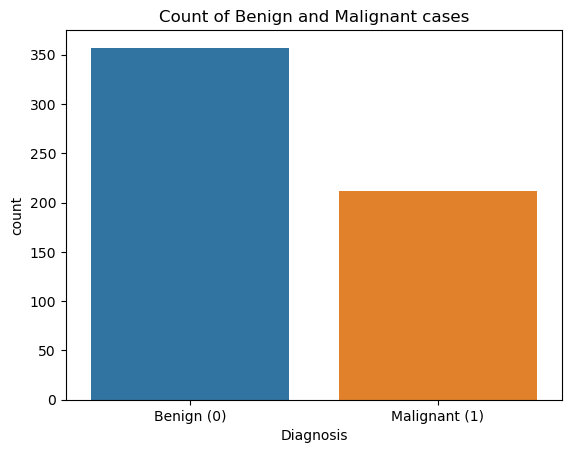

In [13]:
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant cases')
plt.xticks(ticks=[0, 1], labels=["Benign (0)", "Malignant (1)"])
plt.show()


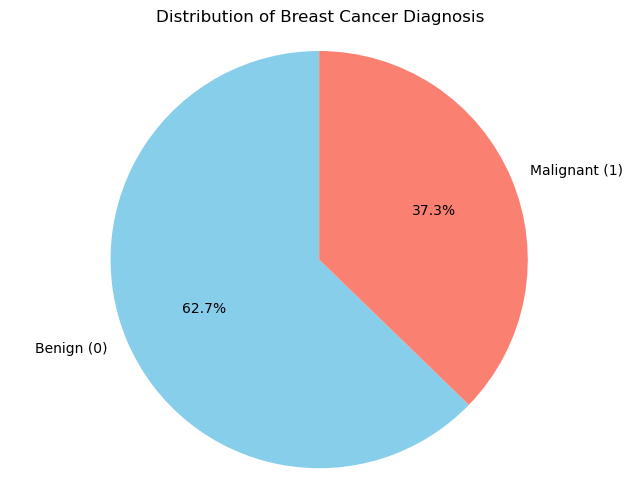

In [14]:
# Create a pie chart for the Distribution of Breast Cancer Diagnosis
diagnosis_counts = data['Diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=['Benign (0)', 'Malignant (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Breast Cancer Diagnosis')
plt.axis('equal')
plt.show()

In [15]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)
# Confirm if there are no missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Some columns have missing values.")


Missing values in each column:
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64
No missing values found in the dataset.


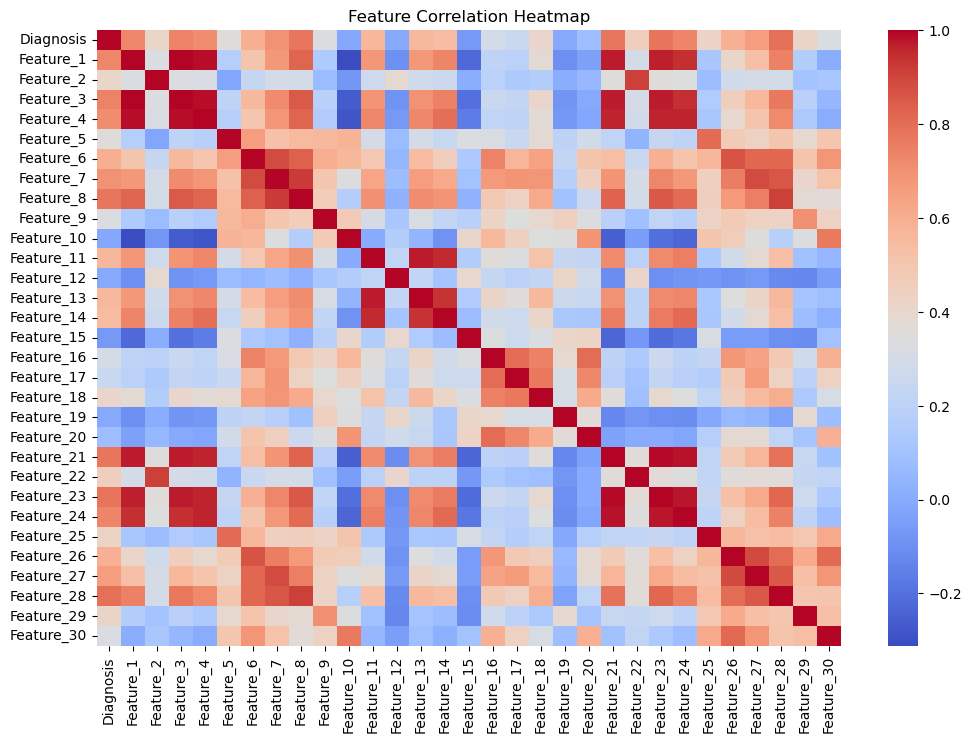

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [17]:
# Calculate and visualize the impact of outliers
# Define IQR method for outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [18]:
# Identify outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print("\nOutliers detected:")
print(outliers.sum())


Outliers detected:
Diagnosis      0
Feature_1     14
Feature_2      7
Feature_3     13
Feature_4     25
Feature_5      6
Feature_6     16
Feature_7     18
Feature_8     10
Feature_9     15
Feature_10    15
Feature_11    38
Feature_12    20
Feature_13    38
Feature_14    65
Feature_15    30
Feature_16    28
Feature_17    22
Feature_18    19
Feature_19    27
Feature_20    28
Feature_21    17
Feature_22     5
Feature_23    15
Feature_24    35
Feature_25     7
Feature_26    16
Feature_27    12
Feature_28     0
Feature_29    23
Feature_30    24
dtype: int64


In [19]:
# Get the number of outliers for each column
num_outliers_per_column = outliers.sum()

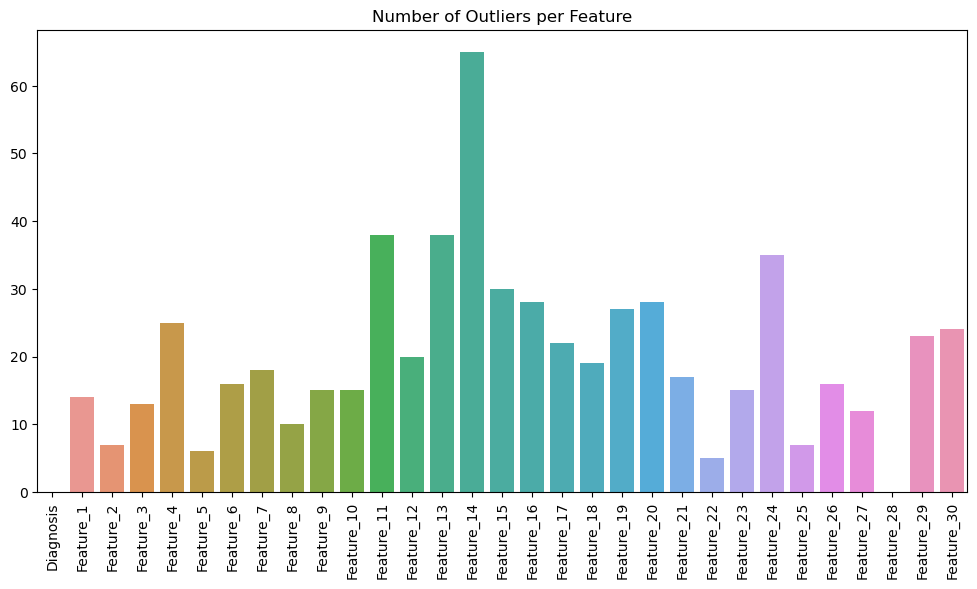

In [20]:
# Visualize the number of outliers per feature
plt.figure(figsize=(12, 6))
sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values)
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.show()


In [21]:
# Split data into features and labels
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [22]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.097064  -2.073335   1.269934   0.984375   1.568466   3.283515   
1   1.829821  -0.353632   1.685955   1.908708  -0.826962  -0.487072   
2   1.579888   0.456187   1.566503   1.558884   0.942210   1.052926   
3  -0.768909   0.253732  -0.592687  -0.764464   3.283553   3.402909   
4   1.750297  -1.151816   1.776573   1.826229   0.280372   0.539340   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_21  Feature_22  \
0   2.652874   2.532475   2.217515    2.255747  ...    1.886690   -1.359293   
1  -0.023846   0.548144   0.001392   -0.868652  ...    1.805927   -0.369203   
2   1.363478   2.037231   0.939685   -0.398008  ...    1.511870   -0.023974   
3   1.915897   1.451707   2.867383    4.910919  ...   -0.281464    0.133984   
4   1.371011   1.428493  -0.009560   -0.562450  ...    1.298575   -1.466770   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0    2.303601    2.00

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
# Applying SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [26]:
# Initialize AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_classifier = AdaBoostClassifier(
   estimator=DecisionTreeClassifier(max_depth=1),  # Decision stump as weak learner
    n_estimators=50,  # Number of weak learners
    learning_rate=1.0,  # Default learning rate
    algorithm="SAMME",  # Set to SAMME to avoid the FutureWarning
    random_state=42
)

In [27]:
ada_classifier.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [28]:
y_pred_smote = ada_classifier.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)
conf_matrix = confusion_matrix(y_test, y_pred_smote)

In [30]:
from tabulate import tabulate

# Model performance metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}

# Convert metrics dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display metrics table in a boxed format
print("\nModel Performance Metrics:")
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Display Confusion Matrix in a boxed format
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
print(tabulate(conf_matrix_df, headers="keys", tablefmt="grid"))


Model Performance Metrics:
+----+-----------+----------+
|    | Metric    |    Score |
+====+===========+==========+
|  0 | Accuracy  | 0.982456 |
+----+-----------+----------+
|  1 | Precision | 0.976744 |
+----+-----------+----------+
|  2 | Recall    | 0.976744 |
+----+-----------+----------+
|  3 | F1 Score  | 0.976744 |
+----+-----------+----------+

Confusion Matrix:
+----------+---------------+---------------+
|          |   Predicted 0 |   Predicted 1 |
+==========+===============+===============+
| Actual 0 |            70 |             1 |
+----------+---------------+---------------+
| Actual 1 |             1 |            42 |
+----------+---------------+---------------+


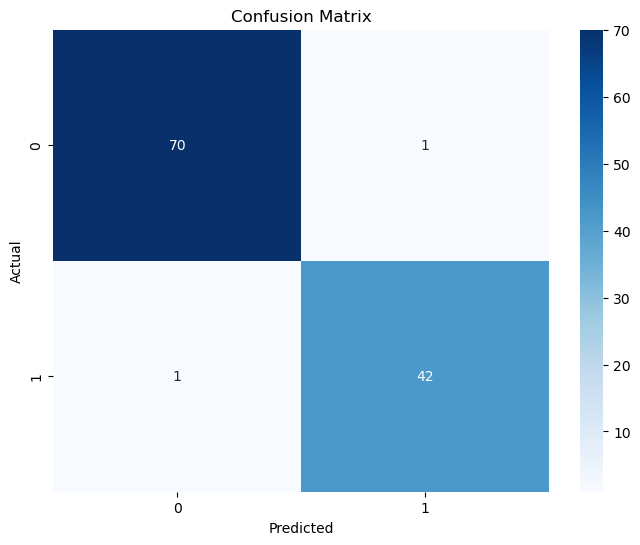

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [32]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0, 1.5],
    'estimator__max_depth': [1, 2, 3]
}

In [33]:
# Perform Grid Search with Cross Validation
!pip install --upgrade scikit-learn
grid_search = GridSearchCV(estimator=ada_classifier,  
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=5,
                            n_jobs=-1,
                            verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [34]:
# Best Parameters and Model
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters from Grid Search:
{'estimator__max_depth': 2, 'learning_rate': 1.5, 'n_estimators': 150}


In [35]:
y_pred_best = best_model.predict(X_test)

In [36]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

In [37]:
from tabulate import tabulate

# Model performance metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy_best, precision_best, recall_best, f1_best]
}

# Convert metrics dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display metrics table in a boxed format
print("\nModel Performance Metrics:")
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Display Confusion Matrix in a boxed format
conf_matrix_df = pd.DataFrame(conf_matrix_best, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
print(tabulate(conf_matrix_df, headers="keys", tablefmt="grid"))


Model Performance Metrics:
+----+-----------+----------+
|    | Metric    |    Score |
+====+===========+==========+
|  0 | Accuracy  | 0.982456 |
+----+-----------+----------+
|  1 | Precision | 1        |
+----+-----------+----------+
|  2 | Recall    | 0.953488 |
+----+-----------+----------+
|  3 | F1 Score  | 0.97619  |
+----+-----------+----------+

Confusion Matrix:
+----------+---------------+---------------+
|          |   Predicted 0 |   Predicted 1 |
+==========+===============+===============+
| Actual 0 |            71 |             0 |
+----------+---------------+---------------+
| Actual 1 |             2 |            41 |
+----------+---------------+---------------+


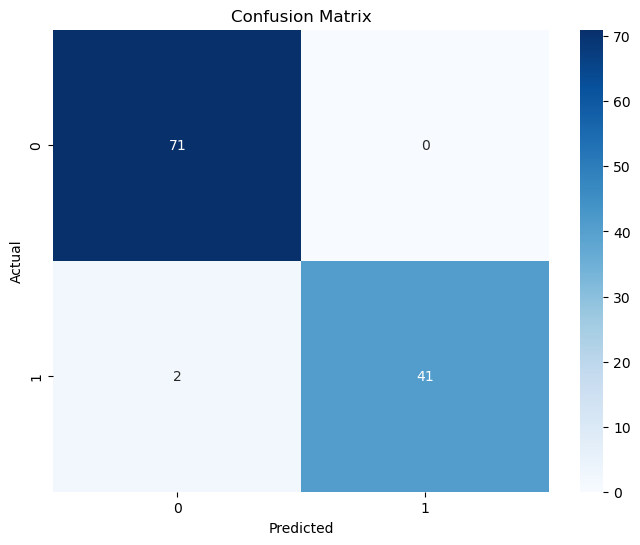

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


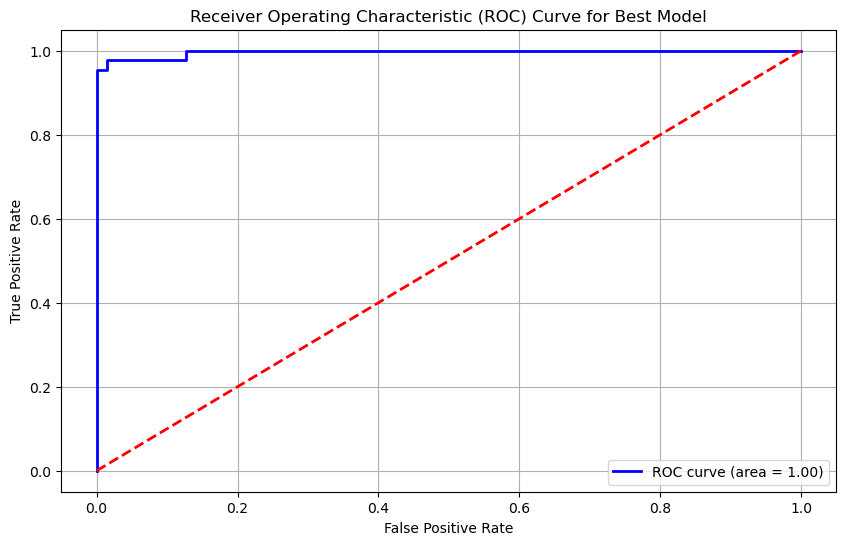

In [39]:
# ROC Curve for the Best Model
# Get predicted probabilities
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
# Calculate ROC curve
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
# Calculate the AUC
roc_auc_best = auc(fpr_best, tpr_best)
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()